In [99]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

datasetPath = "dataset\\data_batch_"

In [100]:
def unpickle(path_batch):
    with open(path_batch, 'rb') as fo:
        batch = pickle.load(fo, encoding='latin1')
    features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    labels = batch['labels']
        
    return features, labels

In [101]:
def get_label_names():
    with open("dataset\\batches.meta", 'rb') as fo:
        data = pickle.load(fo, encoding='latin1')
    return (data['label_names'])

In [102]:
def display_batch_stat(batch_nb):
    features, labels = unpickle(datasetPath + str(batch_nb))
    print("Batch N° %s" % str(batch_nb), "\n")
    print("Number of Samples in batch %s" % str(len(features)), "\n")
    counts =  [[x, labels.count(x)] for x in set(labels)]
    for c in counts:
        print( "%s = %d <=> %.2f %s" % (label_names[c[0]], c[1], (100 * c[1]) / len(features), "%"))
    

In [103]:
label_names = get_label_names()
for i in range(1, 5):
    display_batch_stat(i)

Batch N° 1 

Number of Samples in batch 10000 

airplane = 1005 <=> 10.05 %
automobile = 974 <=> 9.74 %
bird = 1032 <=> 10.32 %
cat = 1016 <=> 10.16 %
deer = 999 <=> 9.99 %
dog = 937 <=> 9.37 %
frog = 1030 <=> 10.30 %
horse = 1001 <=> 10.01 %
ship = 1025 <=> 10.25 %
truck = 981 <=> 9.81 %
Batch N° 2 

Number of Samples in batch 10000 

airplane = 984 <=> 9.84 %
automobile = 1007 <=> 10.07 %
bird = 1010 <=> 10.10 %
cat = 995 <=> 9.95 %
deer = 1010 <=> 10.10 %
dog = 988 <=> 9.88 %
frog = 1008 <=> 10.08 %
horse = 1026 <=> 10.26 %
ship = 987 <=> 9.87 %
truck = 985 <=> 9.85 %
Batch N° 3 

Number of Samples in batch 10000 

airplane = 994 <=> 9.94 %
automobile = 1042 <=> 10.42 %
bird = 965 <=> 9.65 %
cat = 997 <=> 9.97 %
deer = 990 <=> 9.90 %
dog = 1029 <=> 10.29 %
frog = 978 <=> 9.78 %
horse = 1015 <=> 10.15 %
ship = 961 <=> 9.61 %
truck = 1029 <=> 10.29 %
Batch N° 4 

Number of Samples in batch 10000 

airplane = 1003 <=> 10.03 %
automobile = 963 <=> 9.63 %
bird = 1041 <=> 10.41 %
cat = 97

In [104]:
features, labels = unpickle("dataset\\data_batch_1")

In [105]:
X = features.flatten()

In [106]:
labels[1]

9

In [107]:
features[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

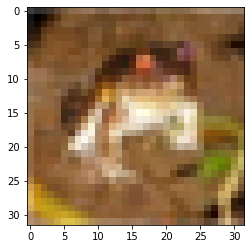

In [108]:
X = features.flatten().reshape(10000, 32*32*3)
plt.imshow(X[0].reshape(32, 32, 3))


In [233]:
X = features.flatten().reshape(10000, 32*32*3)
Y = np.asarray(labels)
Y_all = []
model_all = []

def linear_model(X_param, Y_param, activation_param, optimizer_param, batch_size_param, epochs_param):
    model = tf.keras.Sequential()
    model.add(Dense(1, activation=activation_param, input_dim=32*32*3))
    model.compile(optimizer=optimizer_param, loss="mean_squared_error", metrics=["accuracy"])

    model.fit(X_param, Y_param, batch_size=batch_size_param, verbose=1, epochs=epochs_param)
    return model


for i in range(10):
    Y_all.append(np.array([1 if y == i else -1 for y in Y]))
    model_all.append(linear_model(X, Y_all[i], "tanh", "adam", 10000, 10))


Train on 10000 samples
Epoch 1/10
10000/10000 [==============================] - 0s 24us/sample - loss: 0.7266 - accuracy: 0.0090
Epoch 2/10
10000/10000 [==============================] - 0s 5us/sample - loss: 0.4030 - accuracy: 0.0000e+00
Epoch 3/10
10000/10000 [==============================] - 0s 5us/sample - loss: 0.4024 - accuracy: 0.0000e+00
Epoch 4/10
10000/10000 [==============================] - 0s 5us/sample - loss: 0.4024 - accuracy: 0.0000e+00
Epoch 5/10
10000/10000 [==============================] - 0s 5us/sample - loss: 0.4020 - accuracy: 0.0000e+00
Epoch 6/10
10000/10000 [==============================] - 0s 5us/sample - loss: 0.4020 - accuracy: 0.0000e+00
Epoch 7/10
10000/10000 [==============================] - 0s 5us/sample - loss: 0.4020 - accuracy: 0.0000e+00
Epoch 8/10
10000/10000 [==============================] - 0s 5us/sample - loss: 0.4020 - accuracy: 0.0000e+00
Epoch 9/10
10000/10000 [==============================] - 0s 5us/sample - loss: 0.4020 - accuracy: 0

Epoch 4/10
10000/10000 [==============================] - 0s 5us/sample - loss: 0.4004 - accuracy: 0.0000e+00
Epoch 5/10
10000/10000 [==============================] - 0s 5us/sample - loss: 0.4004 - accuracy: 0.0000e+00
Epoch 6/10
10000/10000 [==============================] - 0s 5us/sample - loss: 0.4004 - accuracy: 0.0000e+00
Epoch 7/10
10000/10000 [==============================] - 0s 5us/sample - loss: 0.4004 - accuracy: 0.0000e+00
Epoch 8/10
10000/10000 [==============================] - 0s 5us/sample - loss: 0.4004 - accuracy: 0.0000e+00
Epoch 9/10
10000/10000 [==============================] - 0s 5us/sample - loss: 0.4004 - accuracy: 0.0000e+00
Epoch 10/10
10000/10000 [==============================] - 0s 5us/sample - loss: 0.4004 - accuracy: 0.0000e+00
Train on 10000 samples
Epoch 1/10
10000/10000 [==============================] - 0s 23us/sample - loss: 3.5438 - accuracy: 0.1023
Epoch 2/10
10000/10000 [==============================] - 0s 6us/sample - loss: 0.4558 - accuracy: 

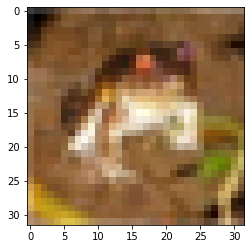

In [234]:
plt.imshow(X[0].reshape(32, 32, 3))

In [235]:
np.shape(X[0].reshape(3072))
print(X[0])

[ 59  62  63 ... 123  92  72]


In [238]:
def predict_liear(model_all, X):
    res = []
    for model in model_all:
        img = X.reshape(1, 3072)
        res.append(model.predict(img)[0][0])
    print(res)
    return res.index(1)
    

img_index = 3
res = predict_liear(model_all, X[img_index])

print("Image predicted is a: " + label_names[res])
print("Image is supposed to be a: " + label_names[Y[img_index]])


[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0]


ValueError: 1 is not in list